# Лабораторная работа 3
### ОЦЕНИВАНИЕ ЛИНЕЙНЫХ РЕГРЕССИОННЫХ МОДЕЛЕЙ В УСЛОВИЯХ ГЕТЕРОСКЕДАСТИЧНОСТИ ВОЗМУЩЕНИЙ

Наша модель:
$$ u = \theta _0 + \theta _1 x_1 + \theta _2 x_1^2 + \theta _3 x_2 + \theta _4 x_2^2 $$

Значения:
$$ \theta = (2, 2.5, 0.03, 0.1, -2) $$

In [87]:
# импорт библиотек
import numpy as np
import pandas as pd
import scipy.stats
import random
from matplotlib import pyplot as plt

In [88]:
# функция u
def u_func(x1, x2):
    return 2 + 2.5*x1 + 0.03*x1*x1 + 0.1*x2 - 2*x2*x2

# theta the original
theta = [2, 2.5, 0.03, 0.1, -2]

n = 3000

In [89]:
x1 = np.array([random.uniform(-1, 1) for _ in range(n)])
x2 = np.array([random.uniform(-1, 1) for _ in range(n)])
y = np.array([])
e = np.array([])

# создание гетероскедастичной модели
for i in range(n):
    x1_i, x2_i = x1[i], x2[i]
    sigma_sq = (1 - abs(x1_i*x2_i))**0.5
    e_i = np.random.normal(0, sigma_sq)
    e = np.append(e, e_i)
    y_i = u_func(x1_i, x2_i) + e_i
    y = np.append(y, y_i)

In [90]:
# создание датафрейма
df = pd.DataFrame({'x1': x1,
                   'x2': x2,
                   'x1^2': x1 ** 2,
                   'x2^2': x2 ** 2,
                   'e': e,
                   'y': y})
df

,x1,x2,x1^2,x2^2,e,y
0,-0.341891,-0.209759,0.116890,0.043999,0.296115,1.335920
1,-0.453762,-0.606772,0.205900,0.368172,-0.786013,-0.711263
2,0.255324,-0.063914,0.065190,0.004085,-0.258259,2.367444
3,0.110319,0.814009,0.012170,0.662611,-0.081534,0.950808
4,0.611269,-0.697446,0.373649,0.486431,1.066411,3.563186
...,...,...,...,...,...,...
2995,0.107316,0.492668,0.011517,0.242722,-0.936903,0.895555
2996,-0.918270,-0.199892,0.843220,0.039957,-0.761332,-1.131614
2997,-0.558809,0.608481,0.312268,0.370249,-0.864990,-0.932294
2998,0.656186,0.596139,0.430580,0.355381,0.515116,3.517350


### Тест Брешуа-Пагана

In [91]:
# оценивание исходного уравнения по МНК, с получением остатков и оценивание дисперсии
X = np.array(df[['x1', 'x1^2', 'x2', 'x2^2']])
X = np.hstack((np.ones((X.shape[0], 1)), X))
Y = np.array(df['y'])

theta_tilda = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
e_t = Y - np.dot(X, theta_tilda)
sigma_sq_new = sum(pow(e_t, 2) / n)
print('sigma_sq_new =', sigma_sq_new)

sigma_sq_new = 0.7573588869959921


In [92]:
# построение регрессии с откликом ct, по регрессорам (1, z1t, ...) и вычисление ESS для нее

# регрессоры
z_t = np.array([np.ones(n), 1 - abs(np.array(df['x1']) * np.array(df['x2']))]).T
# новый отклик с_t = e_t^2 / sigma_sq_new
c_t = pow(e_t, 2) / sigma_sq_new
# оценивание новых параметров
alpha_tilda = np.dot(np.linalg.inv(np.dot(z_t.T, z_t)), np.dot(z_t.T, c_t))
# нормированные квадраты остатков
c_tilda = np.dot(z_t, alpha_tilda)
# ESS
ESS = sum((c_tilda - np.mean(c_t)) ** 2)
FT = scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=n)
print('F =', ESS)
print('FT =', FT)

F = 298.2086988341886
FT = 3.8445603869713225


In [93]:
c_t, alpha_tilda, z_t

(array([0.11488358, 0.7718054 , 0.11282637, ..., 0.94355368, 0.28555986,
        0.04761657]),
 array([-0.04604676,  1.39831742]),
 array([[1.        , 0.92828522],
        [1.        , 0.72466988],
        [1.        , 0.98368114],
        ...,
        [1.        , 0.65997544],
        [1.        , 0.60882241],
        [1.        , 0.54770824]]))

### Гипотеза о гомоскедастичности отвергается



### Тест Голдфельда-Квандтона

In [94]:
# сортировка
df['x1*x2'] = df['x1']*df['x2']
df_sort = df.sort_values(by = 'x1*x2')

In [95]:
df_sort

,x1,x2,x1^2,x2^2,e,y,x1*x2
2781,0.963976,-0.971050,0.929249,0.942937,0.180467,2.635304,-0.936068
2875,-0.929252,0.976431,0.863509,0.953417,-0.161944,-2.268359,-0.907350
1425,-0.973021,0.931458,0.946770,0.867613,-0.138630,-2.184861,-0.906328
1363,-0.998609,0.906925,0.997219,0.822514,-0.193936,-2.214875,-0.905663
2254,-0.931830,0.965013,0.868307,0.931250,0.449771,-1.619753,-0.899228
...,...,...,...,...,...,...,...
2137,0.936886,0.996952,0.877755,0.993913,-0.277235,2.203181,0.934030
1909,0.939181,0.994731,0.882060,0.989489,0.094604,2.589513,0.934232
1148,0.961665,0.996882,0.924799,0.993774,-0.094296,2.449750,0.958667
1923,0.988028,0.971853,0.976198,0.944499,0.375518,3.083061,0.960218


In [96]:
# отбор
n_top = int(n / 3)

df_top = df_sort.iloc[:n_top]
# df_top

n_bottom = n_top * 2
df_bottom = df_sort.iloc[n_bottom:]
# df_bottom

In [97]:
# RSS1

X = np.array(df_top[['x1', 'x1^2', 'x2', 'x2^2']])
Y = np.array(df_top['y'])

# theta_GK - тетта для данного теста
theta_GK = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
y_tilda = np.dot(X, theta_GK)
RSS1 = sum((Y - y_tilda) ** 2)
print(RSS1)

1334.9460755696693


In [98]:
# RSS2

X = np.array(df_bottom[['x1', 'x1^2', 'x2', 'x2^2']])
Y = np.array(df_bottom['y'])

# theta_GK - тетта для данного теста
theta_GK = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
y_tilda = np.dot(X, theta_GK)
RSS2 = sum((Y - y_tilda) ** 2)
print(RSS2)

1291.6226194250398


In [99]:
# RSS1 / RSS2

k = 5
N = (n - n_top - 2 * k) / 2
FT = scipy.stats.chi2.ppf(q=1-0.05, dfn=N, dfd=N)
print('F =', RSS2 / RSS1)
print('FT =', FT)

F = 0.9675466620431526
FT = 1.109978430714682


### Гипотеза о гомоскедастичности отвергается

# Ниже идёт оценка параметров ОМНК и МНК

ОМНК 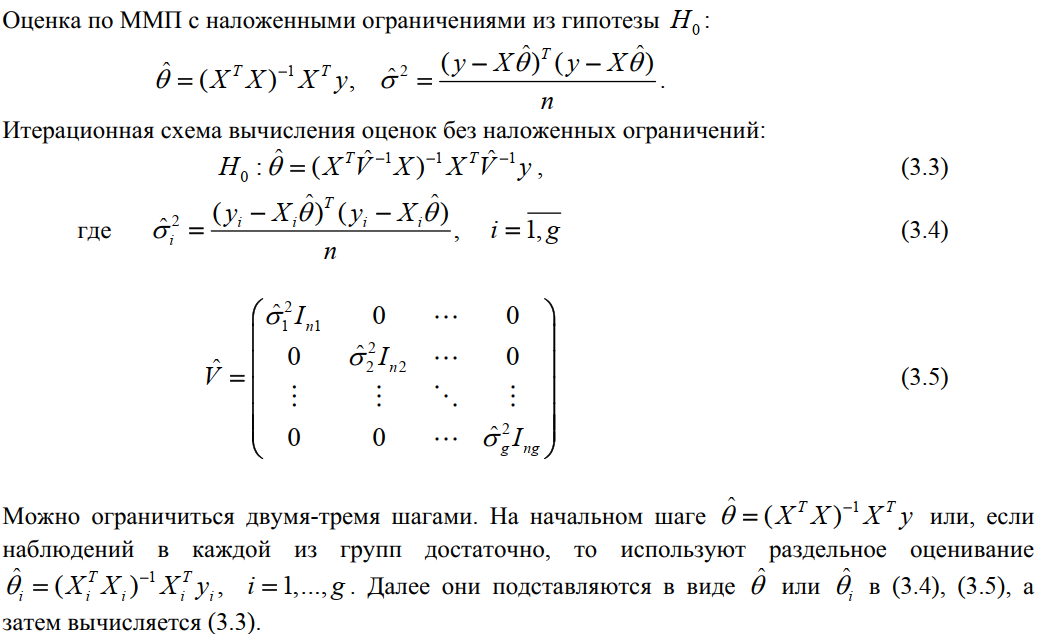

In [100]:
g = n # у нас у всех наблюдений своя сигма
V = np.eye(n)


In [101]:
sigma = z_t @ alpha_tilda
sigma

array([1.25199064, 0.96727176, 1.32945171, ..., 0.8768084 , 0.80528022,
       0.71982322])

In [102]:
for i in sigma:
    if 1/i < 0:
        i = np.exp(i)
#Я не придумал как проще
for i in range(n):
    V[i][i] = sigma[i]
V

array([[1.25199064, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.96727176, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.32945171, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.8768084 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.80528022,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.71982322]])

In [103]:
X = np.array(df_sort[['x1', 'x1^2', 'x2', 'x2^2']])
X = np.hstack((np.ones((X.shape[0], 1)), X))
X.shape[0], X.shape[1]

(3000, 5)

In [104]:
DOMNK = np.linalg.inv(X.T@np.linalg.inv(V)@X)@X.T@np.linalg.inv(V)@y
DOMNK

array([ 1.47751303e+00, -2.79781203e-01, -1.03330461e-01, -2.02941148e-01,
       -7.72040533e-04])

In [110]:
mnk = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
mnk

array([ 1.34304122, -0.02081476,  0.03031563,  0.05653144,  0.09409675])

In [108]:
theta

[2, 2.5, 0.03, 0.1, -2]

In [112]:
err_domnk = (theta - DOMNK).T @ (theta - DOMNK)
err_mnk = (theta - mnk).T @ (theta - mnk)
err_domnk, err_mnk

(12.106638957743444, 11.173232706508683)